In [73]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Check Data Set Structure

In [34]:
df = pd.read_csv("bi.csv", encoding = "latin1")
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [36]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


# Study hours is not correct. this is between 16 Hrs per day and 22 hours per day (which is illogical)

In [37]:
df.shape

(77, 11)

## Question: Which columns should be categorical and which should be numerical?
### Categorical:
    - Gender
    - Country
    - PrevEducation
    - Residence

### Numerical:
    - Age
    - entryEXAM
    - studyHOURS
    - Python
    - DB

# Detect and Fix Inconsistent Categories

In [38]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [39]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [40]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [41]:
df ['gender']= df['gender'].replace({"M":"Male","male":"Male", "F" : "Female", "female": "Female"})
df['gender'].value_counts()

gender
Female    43
Male      34
Name: count, dtype: int64

In [42]:
df['country'].value_counts()

country
Norway          47
Uganda           4
Kenya            3
Germany          3
Italy            2
Spain            2
Netherlands      2
Denmark          2
UK               2
Somali           2
Nigeria          2
France           2
norway           1
Norge            1
South Africa     1
Rsa              1
Name: count, dtype: int64

In [43]:
df['country']= df['country'].replace({"Norge":"Norway", "norway":"Norway", "Rsa" : "South Africa"})
df['country'].value_counts()

country
Norway          49
Uganda           4
Kenya            3
Germany          3
South Africa     2
Denmark          2
Netherlands      2
Spain            2
Italy            2
UK               2
Somali           2
Nigeria          2
France           2
Name: count, dtype: int64

In [44]:
df['prevEducation'].value_counts()

prevEducation
Bachelors       24
High School     18
Masters         16
Diploma          9
Doctorate        5
HighSchool       1
Barrrchelors     1
diploma          1
DIPLOMA          1
Diplomaaa        1
Name: count, dtype: int64

In [45]:
df['prevEducation'] = df['prevEducation'].str.title().str.strip()
df['prevEducation'].value_counts()

prevEducation
Bachelors       24
High School     18
Masters         16
Diploma         11
Doctorate        5
Highschool       1
Barrrchelors     1
Diplomaaa        1
Name: count, dtype: int64

In [46]:
df['prevEducation'] = df['prevEducation'].replace({"Diplomaaa":"Diploma", "Barrrchelors": "Bachelors", "Highschool":"High School"})
df['prevEducation'].value_counts()

prevEducation
Bachelors      25
High School    19
Masters        16
Diploma        12
Doctorate       5
Name: count, dtype: int64

In [47]:
df["residence"].value_counts()

residence
Private         33
BI Residence    29
Sognsvann       12
BI-Residence     1
BIResidence      1
BI_Residence     1
Name: count, dtype: int64

In [48]:
df["residence"]= df["residence"].replace({"BI-Residence":"BI Residence","BIResidence":"BI Residence","BI_Residence":"BI Residence"})
df["residence"].value_counts()

residence
Private         33
BI Residence    32
Sognsvann       12
Name: count, dtype: int64

# Check and Handle Duplicates

In [49]:
df[df.duplicated()]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB


# Part 2
# Identify Missing Values

In [50]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [51]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Question: Which columns are most affected by missing values?
Python



In [52]:
df[df["Python"].isnull() == True]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
33,Frank,Abrahamsen,23,Male,Norway,BI Residence,68,High School,152,NaN,70


In [53]:
df["Python"].describe()

count    75.000000
mean     75.853333
std      15.410328
min      15.000000
25%      71.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64

In [54]:
mean = df["Python"].mean()
df["Python"] = df["Python"].fillna(round(mean))
df["Python"].isnull().sum()

np.int64(0)

In [55]:
df["Python"].loc[[3,33]]

3     76.0
33    76.0
Name: Python, dtype: float64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


### Only Python scores had 2 missing values, filled with mean

# Part 3 
# Outliers


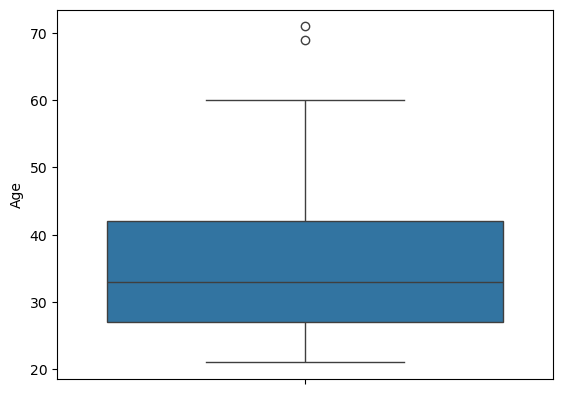

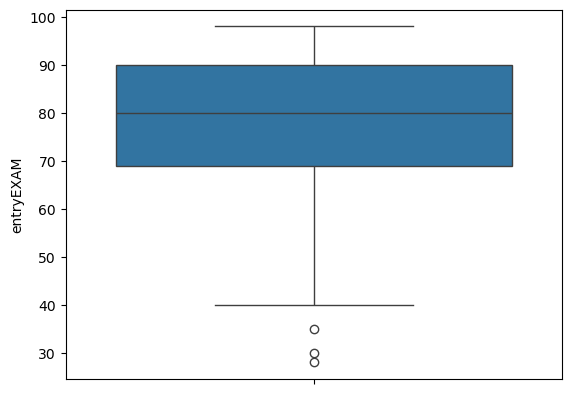

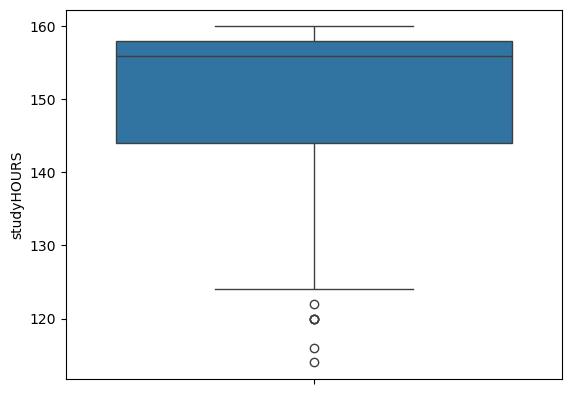

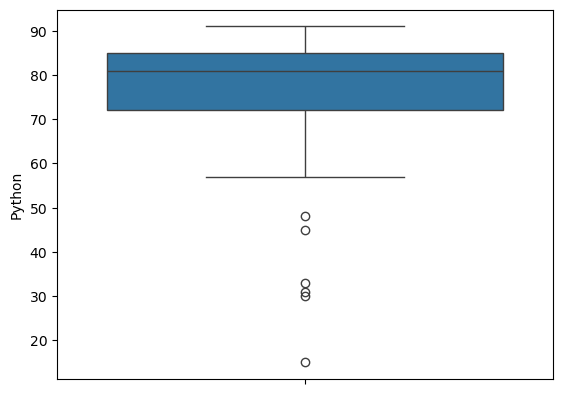

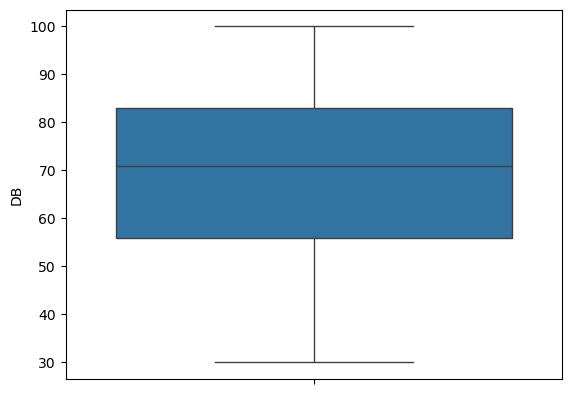

In [57]:
df_num = df.select_dtypes(include = ["float64", "int64"])
for column in df_num.columns:
    sns.boxplot(data = df_num[column])
    plt.show()



## Question: Which values in studyHOURS, Python, or DB look unrealistic?
all the values in the studyHOURS are unrealistic. they range between 16 and 22 hours per day (no body can study these long hours daily)
Python and DB are realistic

### Applying IQR Method 

In [58]:
Q1 = df_num.quantile(0.25)
Q1

Age            27.0
entryEXAM      69.0
studyHOURS    144.0
Python         72.0
DB             56.0
Name: 0.25, dtype: float64

In [59]:
Q3 = df_num.quantile(0.75)
Q3

Age            42.0
entryEXAM      90.0
studyHOURS    158.0
Python         85.0
DB             83.0
Name: 0.75, dtype: float64

In [60]:
IQR = Q3 - Q1
IQR

Age           15.0
entryEXAM     21.0
studyHOURS    14.0
Python        13.0
DB            27.0
dtype: float64

In [61]:
limit_min = Q1 - (1.5 * IQR)
limit_min

Age             4.5
entryEXAM      37.5
studyHOURS    123.0
Python         52.5
DB             15.5
dtype: float64

In [62]:
limit_max = Q3 + (1.5 * IQR)
limit_max

Age            64.5
entryEXAM     121.5
studyHOURS    179.0
Python        104.5
DB            123.5
dtype: float64

In [63]:
mask = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
outliers = df_num[mask.any(axis = 1)]
outliers

,Age,entryEXAM,studyHOURS,Python,DB
3,22,40,120,76.0,44
4,23,65,122,91.0,80
20,22,45,116,33.0,30
21,24,50,114,30.0,50
32,71,30,120,31.0,42
48,26,68,124,48.0,62
49,28,69,120,45.0,70
53,36,28,120,15.0,67
55,69,94,160,87.0,88
76,31,35,144,72.0,90


In [64]:
mask = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
outliers2 = df[mask.any(axis = 1)]
outliers2

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,76.0,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
20,Prof,Birkeland,22,Male,Norway,BI Residence,45,High School,116,33.0,30
21,Hanna,Isaksen,24,Female,Norway,BI Residence,50,High School,114,30.0,50
32,Perry,Rønning,71,Female,Norway,Private,30,Doctorate,120,31.0,42
48,Jenny,Kristoffersen,26,Female,Norway,BI Residence,68,High School,124,48.0,62
49,Thea,Knutsen,28,Male,Norway,BI Residence,69,High School,120,45.0,70
53,Chinedu,Morison,36,Male,Nigeria,Private,28,Diploma,120,15.0,67
55,Chinedu,Okafor,69,Male,Nigeria,Private,94,Doctorate,160,87.0,88
76,Mohammed,Salim,31,Male,Somali,Sognsvann,35,Masters,144,72.0,90


# Feature Engineering

In [66]:
# New Feature "programming averge"
df['programming average'] = (df['Python'] + df['DB'])/2
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,programming average
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,76.0,44,60.0
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80,85.5


In [67]:
df['isAdult'] = (df['Age']>=25).astype(int)
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,programming average,isAdult
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,1
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5,1
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0,1
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,76.0,44,60.0,0
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80,85.5,0


In [68]:
df['studyHOURS'] = pd.cut(df['studyHOURS'], bins = 3, labels = ["Low", "Medium", "High"])
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,programming average,isAdult
0,Christina,Binger,44,Female,Norway,Private,72,Masters,High,59.0,55,57.0,1
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,High,60.0,75,67.5,1
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,Medium,74.0,50,62.0,1
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,Low,76.0,44,60.0,0
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,Low,91.0,80,85.5,0


## Question: Which engineered feature do you think would add the most predictive power to the model?
Programing average

# Feature Scaling

In [70]:
df_num = df.select_dtypes(include=["number"])
df_num.head()

,Age,entryEXAM,Python,DB,programming average,isAdult
0,44,72,59.0,55,57.0,1
1,60,79,60.0,75,67.5,1
2,25,55,74.0,50,62.0,1
3,22,40,76.0,44,60.0,0
4,23,65,91.0,80,85.5,0


In [76]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Age','entryEXAM','Python','DB','programming average']])
scaled


array([[0.46      , 0.62857143, 0.57894737, 0.35714286, 0.41463415],
       [0.78      , 0.72857143, 0.59210526, 0.64285714, 0.58536585],
       [0.08      , 0.38571429, 0.77631579, 0.28571429, 0.49593496],
       [0.02      , 0.17142857, 0.80263158, 0.2       , 0.46341463],
       [0.04      , 0.52857143, 1.        , 0.71428571, 0.87804878],
       [0.08      , 0.54285714, 0.96052632, 0.41428571, 0.68292683],
       [0.12      , 0.88571429, 0.85526316, 0.87142857, 0.87804878],
       [0.16      , 0.87142857, 0.92105263, 0.42857143, 0.66666667],
       [0.2       , 0.85714286, 0.85526316, 0.84285714, 0.86178862],
       [0.24      , 0.81428571, 0.89473684, 0.85714286, 0.89430894],
       [0.26      , 0.52857143, 0.84210526, 0.4       , 0.60162602],
       [0.3       , 0.6       , 0.85526316, 0.35714286, 0.58536585],
       [0.34      , 0.9       , 0.92105263, 0.98571429, 0.98373984],
       [0.38      , 0.7       , 0.72368421, 0.65714286, 0.67479675],
       [0.42      , 0.74285714, 0.

In [77]:
df[['Age','entryEXAM','Python','DB','programming average']] = scaled
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,programming average,isAdult
0,Christina,Binger,0.46,Female,Norway,Private,0.628571,Masters,High,0.578947,0.357143,0.414634,1
1,Alex,Walekhwa,0.78,Male,Kenya,Private,0.728571,Diploma,High,0.592105,0.642857,0.585366,1
2,Philip,Leo,0.08,Male,Uganda,Sognsvann,0.385714,High School,Medium,0.776316,0.285714,0.495935,1
3,Shoni,Hlongwane,0.02,Female,South Africa,Sognsvann,0.171429,High School,Low,0.802632,0.200000,0.463415,0
4,Maria,Kedibone,0.04,Female,South Africa,Sognsvann,0.528571,High School,Low,1.000000,0.714286,0.878049,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   fNAME                77 non-null     object  
 1   lNAME                77 non-null     object  
 2   Age                  77 non-null     float64 
 3   gender               77 non-null     object  
 4   country              77 non-null     object  
 5   residence            77 non-null     object  
 6   entryEXAM            77 non-null     float64 
 7   prevEducation        77 non-null     object  
 8   studyHOURS           77 non-null     category
 9   Python               77 non-null     float64 
 10  DB                   77 non-null     float64 
 11  programming average  77 non-null     float64 
 12  isAdult              77 non-null     int64   
dtypes: category(1), float64(5), int64(1), object(6)
memory usage: 7.6+ KB


In [83]:
df_cat = df.select_dtypes(include={"object", "category"})
df_cat.head()

,fNAME,lNAME,gender,country,residence,prevEducation,studyHOURS
0,Christina,Binger,Female,Norway,Private,Masters,High
1,Alex,Walekhwa,Male,Kenya,Private,Diploma,High
2,Philip,Leo,Male,Uganda,Sognsvann,High School,Medium
3,Shoni,Hlongwane,Female,South Africa,Sognsvann,High School,Low
4,Maria,Kedibone,Female,South Africa,Sognsvann,High School,Low
